# Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [21]:
df_fpkms = pd.read_csv("../../qbb2021/data/fpkms.csv", index_col = "t_name")
df_fpkms

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,,
FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591


### Want to plot male 14D vs. female 14D for all genes, M fold change vs. A abundance
### Isolate "t_name", "gene_name", "male_14D" and 

In [25]:
df_fpkms_MvF = df_fpkms.loc[:, ["t_name", "gene_name", "male_14D", "female_14D"]]

,gene_name,male_14D,female_14D
t_name,,,
FBtr0114258,CR41571,0.000000,0.00000
FBtr0346770,CG45784,0.000000,0.00000
FBtr0302440,CR12798,0.000000,0.00000
FBtr0302347,CR40182,11.682728,17.20257
FBtr0346769,CG45783,0.000000,0.00000
...,...,...,...
FBtr0114187,CR40502,0.000000,0.00000
FBtr0304147,CR40719,0.000000,0.00000
FBtr0114216,CR40679,9.190801,1.98591


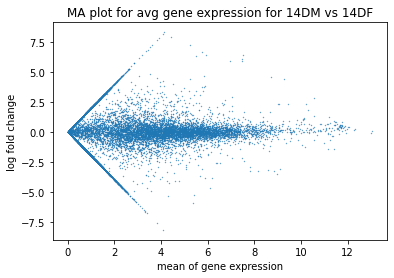

In [38]:
R = df_fpkms.loc[:,"male_14D"]
R = np.log2(R+1) #rescale
G = df_fpkms.loc[:,"female_14D"]
G = np.log2(G+1) #rescale

A = (0.5*(R+G))
M = (R - G)

fig, ax = plt.subplots()
ax.scatter(A, M, s=0.1) #make points smaller
ax.set_title("MA plot for avg gene expression for 14DM vs 14DF")
plt.xlabel("mean of gene expression")
plt.ylabel("log fold change")
plt.show()

#R, G = Male14D, F14D

#lines at edges = logs not expressed in x condition, y condition
#each dot = gene

